# part 1

In [ ]:
!pip install helpers

In [ ]:
!pip install  spotipy

     |████████████████████████████████| 62 kB 682 kB/s 
     |████████████████████████████████| 138 kB 29.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#. upload font ภาษาไทย
from google.colab import files
uploaded = files.upload()

Saving thsarabunnew-webfont.ttf to thsarabunnew-webfont.ttf


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_theme()
%matplotlib inline

matplotlib.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
!wget -q https://github.com/Phonbopit/sarabun-webfont/blob/master/fonts/thsarabunnew-webfont.ttf
matplotlib.rc('font',family='TH Sarabun New',size = 18)
#plt.rcParams['font.family'] = 'TH Sarabun New'

In [ ]:
cid = '4341c0a0338b4916891e090563b5f198'
secret = '8598c004ddaf457993f07190cf0b2a97'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]


        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        track_inf0_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

In [ ]:
def get_songs_features(ids):

    meta = sp.track(ids)
    release_date = meta['album']['release_date']
    popularity = meta['popularity']
    track = [release_date, popularity]
    return track

#1. Mood ความคิดถึง

## step 1 dataframe

In [ ]:
df_miss = call_playlist("spotify","37i9dQZF1DX7wnCfGfUD8C")

In [ ]:
date=[]
pop=[]
for id in df_miss["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_miss = pd.concat([df_miss, track_info_df], axis=1)
df_miss['year'] = pd.DatetimeIndex(df_miss['date']).year
df_miss= df_miss.drop('date', 1)

In [ ]:
df_miss.shape

(100, 16)

In [ ]:
df_miss.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Patrickananda,คนไกล,คนไกล,63VOJDNJ3a5dve74kzWVcF,0.638,0.193,9,-12.366,1,0.0357,0,0.316,0.550,140.118,53,2020
1,Musketeers,Left Right And Something,ไกล,07ZIrtR00m3t9AcmeRZ7vQ,0.388,0.660,8,-6.303,1,0.0289,4.09e-06,0.141,0.655,96.036,52,2015
2,Ink Waruntorn,ลบไม่ได้ช่วยให้ลืม (Erase),ลบไม่ได้ช่วยให้ลืม (Erase),5AMYykC6sdveY7NfwHNUm4,0.533,0.725,8,-5.350,1,0.1210,0,0.303,0.590,163.941,57,2020
3,Hers,ยังคงคอย,ยังคงคอย,7tFrJ1JPTVmQKVU5XlGQdb,0.784,0.268,2,-14.390,1,0.0311,0.000555,0.111,0.569,91.998,52,2017
4,Tilly Birds,คิด(แต่ไม่)ถึง (Same Page?),คิด(แต่ไม่)ถึง (Same Page?),4Cg2XGrrrczeZRPOnlAG67,0.627,0.801,10,-4.208,1,0.0305,0,0.157,0.811,95.031,56,2020


# 2.10ปีกับรักแสนเศร้า

In [ ]:
df_sad = call_playlist("spotify","37i9dQZF1DX2P6tBdicPOd")

In [ ]:
date=[]
pop=[]
for id in df_sad["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_sad = pd.concat([df_sad, track_info_df], axis=1)
df_sad['year'] = pd.DatetimeIndex(df_sad['date']).year
df_sad= df_sad.drop('date', 1)

In [ ]:
df_sad.shape

(100, 16)

In [ ]:
df_sad.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,ETC.,เปลี่ยน,เธอคือใคร,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0,0.0985,0.338,133.989,44,2007
1,Gene Kasidit,BLONDE,ร W8,3zc9UfgETcTMGiazW58Klg,0.473,0.848,4,-4.061,1,0.0296,0,0.0991,0.396,160.012,51,2014
2,Tiger Band,รถของเล่น,รถของเล่น,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0,0.1100,0.794,84.981,47,2013
3,Tattoo Colour,POP DAD,ซ่อนหา,3xFlPMvop19xcGxnuItFNo,0.444,0.455,7,-7.396,1,0.0322,0,0.1680,0.376,141.645,42,2014
4,60Miles,หากฉันตาย,หากฉันตาย,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0,0.0878,0.336,159.807,43,2013


#3.ร้องไห้หนักมาก

In [ ]:
df_cry = call_playlist("spotify","37i9dQZF1DX4tHo2ftQyun")

In [ ]:
date=[]
pop=[]
for id in df_cry["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_cry = pd.concat([df_cry, track_info_df], axis=1)
df_cry['year'] = pd.DatetimeIndex(df_cry['date']).year
df_cry= df_cry.drop('date', 1)

In [ ]:
df_cry.shape

(100, 16)

In [ ]:
df_cry.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,WANYAi,เงา,เงา,6yrxuUnWFv72Veb9jphPLL,0.523,0.615,6,-6.549,1,0.0398,0,0.1450,0.534,162.059,50,2020
1,SERIOUS BACON,ไม่อยากฟัง,ไม่อยากฟัง,5NHUdpYUEHL8fDLmR1qFd8,0.556,0.569,4,-6.636,1,0.0291,1.12e-06,0.0834,0.507,170.084,56,2020
2,Mirrr,นิโคติน - Single,นิโคติน,6R9YzJHkfYoN6PianPhTdB,0.574,0.592,0,-6.926,1,0.0386,0,0.1270,0.387,131.841,59,2020
3,EASE,ขอโทษที่ไม่ลืม,ขอโทษที่ไม่ลืม,5k8RfX1gS3KSNmpCiEP5aH,0.407,0.518,2,-8.139,1,0.0316,0,0.2430,0.366,163.819,41,2019
4,Ink Waruntorn,อยากเริ่มต้นใหม่กับคนเดิม (repeat),อยากเริ่มต้นใหม่กับคนเดิม (repeat),1E0waZD9GmD0SkbEhk19J4,0.550,0.794,2,-5.020,1,0.0447,1.27e-05,0.1090,0.608,163.900,56,2020


# 4.เป็นท้อ

In [ ]:
df_dis = call_playlist("spotify","37i9dQZF1DWTlbUjNA5MKD")

In [ ]:
date=[]
pop=[]
for id in df_dis["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_dis = pd.concat([df_dis, track_info_df], axis=1)
df_dis['year'] = pd.DatetimeIndex(df_dis['date']).year
df_dis= df_dis.drop('date', 1)

In [ ]:
df_dis.shape

(100, 16)

In [ ]:
df_dis.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Three Man Down,ผ่านตา (Everyday),ผ่านตา (Everyday),7HA6Jhuis4khuPJffFGM7Y,0.582,0.881,0,-5.750,1,0.0265,0.002290,0.4410,0.854,104.010,50,2018
1,Ink Waruntorn,ลบไม่ได้ช่วยให้ลืม (Erase),ลบไม่ได้ช่วยให้ลืม (Erase),5AMYykC6sdveY7NfwHNUm4,0.533,0.725,8,-5.350,1,0.1210,0.000000,0.3030,0.590,163.941,57,2020
2,Safeplanet,ถ้าเธอได้รู้ (The Secret ∆),ถ้าเธอได้รู้ (The Secret ∆),2Dvx3VrvPu8rD13LAua1i7,0.405,0.748,3,-6.539,1,0.0305,0.000029,0.0581,0.227,179.969,52,2020
3,UrboyTJ,Selfmade,ถามคำ,3sLTOt7ZMwEWEB7YdLaeZS,0.692,0.803,2,-6.563,1,0.0369,0.000000,0.3220,0.804,88.021,55,2020
4,Tilly Birds,เพื่อนเล่น ไม่เล่นเพื่อน (Just Being Friendly)...,เพื่อนเล่น ไม่เล่นเพื่อน (Just Being Friendly),19KNYtZF0xP7VCIItvGSJZ,0.793,0.578,5,-4.607,1,0.0478,0.000000,0.1360,0.673,109.949,65,2021


# 5.เพลงรักไม่เคยลืม

In [ ]:
df_love = call_playlist("spotify","37i9dQZF1DWTI9rv1dQs8H")

In [ ]:
date=[]
pop=[]
for id in df_love["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_love = pd.concat([df_love, track_info_df], axis=1)
df_love['year'] = pd.DatetimeIndex(df_love['date']).year
df_love= df_love.drop('date', 1)

In [ ]:
df_love

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Various Artists,Hot Vote Vol.2,หลับตา,4X8QjxXDiOGYbmH9zi6XYb,0.620,0.214,10,-14.417,1,0.0268,0.004240,0.0975,0.193,82.235,35,1993
1,Bird Thongchai,บูมเมอแรง,หมอกหรือควัน,0JsrgKbvRPJVGieuKP3luQ,0.594,0.705,7,-6.416,1,0.0260,0.000027,0.4070,0.858,107.686,44,1990
2,พรพิมล ธรรมสาร,คิดถึงวันวาน,สายเกินไป,4aqDmgbYDibefToX4GoyJ5,0.868,0.693,0,-6.295,1,0.0328,0.000000,0.1750,0.961,113.664,37,2004
3,Viyada Komarakul Na Nakorn,เพียงแค่ใจเรารักกัน,เพียงแค่ใจเรารักกัน,1PpKRuyNMgJN284DmBQSRn,0.784,0.633,2,-4.620,1,0.0322,0.000000,0.1000,0.508,100.032,42,1986
4,Asanee & Wasan,สับปะรด,คงเดิม,5gEDVRgPGlrYmi4KRP154V,0.707,0.603,7,-9.533,1,0.0267,0.000001,0.0980,0.756,119.995,39,1990
5,เพชร โอสถานุเคราะห์,ธรรมดามันเป็นเรื่องธรรมดา,เพียงชายคนนี้ (ไม่ใช่ผู้วิเศษ),4NRGiVJgJDhnqnHr0z6Fal,0.673,0.668,2,-5.640,1,0.0302,0.000000,0.0801,0.287,131.673,40,1992
6,Danupol Kaewkarn,ฝันสีทอง Audiophile Remastered,แสนรัก,0BgdNe1BiMAF3F9qI0w5uN,0.278,0.419,0,-7.338,1,0.0287,0.678000,0.1440,0.253,151.195,1,2016
7,The Innocent,#8 ครั้งนี้ของพี่กับน้อง,ฝากรัก,66aCdSMkAV82BgrdRYKE2W,0.681,0.552,4,-7.261,1,0.0251,0.020000,0.1100,0.634,114.327,36,1986
8,Charas Ferngahrom,ชรัสวันนี้,ทั้งรู้ก็รัก,2abpokAq5ahV7wDLRRq31k,0.686,0.455,10,-7.707,1,0.0347,0.009050,0.0822,0.383,186.303,41,1986
9,Bird Thongchai,The Very Best Of Bird,ด้วยรักและผูกพัน,3ItLXQ6yOuGxShlypeRJHU,0.624,0.648,9,-6.060,1,0.0291,0.000000,0.1230,0.375,99.414,33,1996


In [ ]:
df_love.shape

(60, 16)

In [ ]:
df_love.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Various Artists,Hot Vote Vol.2,หลับตา,4X8QjxXDiOGYbmH9zi6XYb,0.620,0.214,10,-14.417,1,0.0268,0.004240,0.0975,0.193,82.235,35,1993
1,Bird Thongchai,บูมเมอแรง,หมอกหรือควัน,0JsrgKbvRPJVGieuKP3luQ,0.594,0.705,7,-6.416,1,0.0260,0.000027,0.4070,0.858,107.686,44,1990
2,พรพิมล ธรรมสาร,คิดถึงวันวาน,สายเกินไป,4aqDmgbYDibefToX4GoyJ5,0.868,0.693,0,-6.295,1,0.0328,0.000000,0.1750,0.961,113.664,37,2004
3,Viyada Komarakul Na Nakorn,เพียงแค่ใจเรารักกัน,เพียงแค่ใจเรารักกัน,1PpKRuyNMgJN284DmBQSRn,0.784,0.633,2,-4.620,1,0.0322,0.000000,0.1000,0.508,100.032,42,1986
4,Asanee & Wasan,สับปะรด,คงเดิม,5gEDVRgPGlrYmi4KRP154V,0.707,0.603,7,-9.533,1,0.0267,0.000001,0.0980,0.756,119.995,39,1990


# 6.ฟังเพลินตอนทำงาน

In [ ]:
df_work = call_playlist("spotify","37i9dQZF1DWUeFzTSNBzKM")

In [ ]:
date=[]
pop=[]
for id in df_work["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_work = pd.concat([df_work, track_info_df], axis=1)
df_work['year'] = pd.DatetimeIndex(df_work['date']).year
df_work= df_work.drop('date', 1)

In [ ]:
df_work

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Three Man Down,ข้างกัน (City) [feat. ออม TELExTELEXs],ข้างกัน (City),2XDCs8vAubxRe8mO1A0eTa,0.469,0.727,2,-7.484,1,0.0263,0.000918,0.2700,0.341,176.011,45,2020
1,Ink Waruntorn,สายตาหลอกกันไม่ได้ (Eyes don't lie),สายตาหลอกกันไม่ได้ (Eyes don't lie),4CTgPJbgNQ031q8HzhTtq2,0.552,0.796,5,-6.227,0,0.1250,0.000001,0.2200,0.697,172.128,61,2021
2,Pramote Vilepana,MOVE ON,MOVE ON,0Q3RF9qFwUDYjcmrzSgm8R,0.623,0.417,2,-6.038,1,0.0321,0.000019,0.1000,0.334,128.000,49,2020
3,UrboyTJ,Selfmade,ถามคำ,3sLTOt7ZMwEWEB7YdLaeZS,0.692,0.803,2,-6.563,1,0.0369,0.000000,0.3220,0.804,88.021,55,2020
4,Whatcharawale,Legend,น้อย,1LOAgM7DIxdprmoaoo990N,0.697,0.356,9,-9.217,1,0.1500,0.000012,0.1270,0.601,66.995,53,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Polycat,ข่าวดี,ข่าวดี,41jjpmHzS1LLhhpaONRUMG,0.614,0.824,9,-4.911,1,0.0406,0.000000,0.1490,0.425,83.003,37,2020
96,Earth Patravee,คิดไม่คิด,คิดไม่คิด,2K7gwruclvSWntbV21vP6a,0.779,0.499,4,-7.488,1,0.0296,0.000370,0.1110,0.557,104.980,41,2021
97,NO ONE ELSE,ต่อจากนี้เพลงรักทุกเพลงจะเป็นของเธอเท่านั้น,ต่อจากนี้เพลงรักทุกเพลงจะเป็นของเธอเท่านั้น,315ar0QJiyciYkdVJUGA3w,0.502,0.637,9,-6.214,1,0.0437,0.000000,0.2120,0.485,169.896,59,2021
98,Various Artists,All You Need is Love 3,กะทันหัน,71rZCPjOAU8WBlXYPHNgRu,0.736,0.585,9,-7.578,1,0.0300,0.000000,0.1080,0.731,95.013,45,2014


# 7.อารมณ์ทะเล

In [ ]:
df_sea = call_playlist("spotify","37i9dQZF1DWZBKvnmbtGSw")

In [ ]:
date=[]
pop=[]
for id in df_sea["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_sea = pd.concat([df_sea, track_info_df], axis=1)
df_sea['year'] = pd.DatetimeIndex(df_sea['date']).year
df_sea= df_sea.drop('date', 1)

In [ ]:
df_sea

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Billkin,โคตรพิเศษ (From “แปลรักฉันด้วยใจเธอ”),โคตรพิเศษ - (From “แปลรักฉันด้วยใจเธอ”),6MVbuOWvXHbPHtVwScK6M1,0.513,0.469,7,-8.166,1,0.0411,0,0.1220,0.433,177.886,29,2020
1,QLER,วอนนภา (LA DI DA),วอนนภา (LA DI DA),72qN76bsjmlmqO5wtSsKxD,0.675,0.548,9,-9.225,1,0.0429,0.00254,0.1070,0.809,160.066,46,2021
2,SERIOUS BACON,1001 (You're Lovely),1001 (You're Lovely),7ip4DUtdpLH4TkHfKgFbpf,0.678,0.569,11,-9.101,1,0.0319,0,0.2500,0.400,94.995,59,2021
3,Three Man Down,This City Won’t Be Lonely Anymore,Friend Zone,70gE5odAgYvmx0qB1bWDHz,0.786,0.569,0,-6.926,1,0.0389,0,0.1790,0.801,94.021,57,2021
4,The Toys,ไม่รับสาย,ไม่รับสาย,5ndp5yVxoWbTSDRY1nAipf,0.822,0.678,0,-3.494,1,0.0341,2.94e-06,0.0975,0.535,83.497,44,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Namm Ronnadet,แอบ,แอบ,1ouhec3dkguVevVmcTIFtC,0.758,0.764,7,-4.587,1,0.0451,0,0.1060,0.667,98.025,31,2019
76,loserpop,คุยก่อน,คุยก่อน,77HaVfZRGrmCLECDaVRgoq,0.661,0.793,7,-5.728,1,0.0820,0.00107,0.1150,0.910,167.979,40,2021
77,Tattoo Colour,Hong Ser,อากาศร้อนๆ,2kcR2dYA8aP06yNEJERsnt,0.459,0.847,2,-3.785,1,0.0760,0,0.1670,0.674,187.970,35,2006
78,Two Popetorn,ยิ่งไกลยิ่งชัด,ยิ่งไกลยิ่งชัด,1a36bnN4bRYpP8pbPdJbft,0.790,0.625,4,-5.452,1,0.0738,0,0.0821,0.906,109.051,32,2019


# 8.เพลงไทยสายชิลล์

In [ ]:
df_chill = call_playlist("spotify","37i9dQZF1DX0bGxKepv6YZ")

In [ ]:
date=[]
pop=[]
for id in df_chill["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_chill = pd.concat([df_chill, track_info_df], axis=1)
df_chill['year'] = pd.DatetimeIndex(df_chill['date']).year
df_chill= df_chill.drop('date', 1)

In [ ]:
df_chill

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Whatcharawale,Legend,ร่มสีเทา,6z56u8jPSSroDFrJVD5cMf,0.556,0.7490,4,-6.008,1,0.2450,0,0.2090,0.787,169.555,53,2016
1,Patrickananda,Oasis,Oasis,0h48eAfbK0dlgnTf3x1lmK,0.609,0.3020,6,-8.700,1,0.0322,0,0.1050,0.426,131.636,49,2021
2,Billkin,โคตรพิเศษ (From “แปลรักฉันด้วยใจเธอ”),โคตรพิเศษ - (From “แปลรักฉันด้วยใจเธอ”),6MVbuOWvXHbPHtVwScK6M1,0.513,0.4690,7,-8.166,1,0.0411,0,0.1220,0.433,177.886,29,2020
3,Various Artists,Music is forever vol.2 BOSSA VACAY,Event,4RH90C098o1YD0CLRRmWNB,0.486,0.5260,4,-8.348,1,0.1700,5.73e-05,0.1390,0.547,199.837,50,2016
4,Hers,ยังคงคอย,ยังคงคอย,7tFrJ1JPTVmQKVU5XlGQdb,0.784,0.2680,2,-14.390,1,0.0311,0.000555,0.1110,0.569,91.998,52,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Room 39,รักตัวเอง,รักตัวเอง,46Uqy57KyAT7xBz6BIqdB3,0.756,0.7280,7,-5.637,1,0.0477,0,0.0785,0.912,92.006,0,2017
76,เต้ ดาวิชญ์ กรีพลฤกษ์,ใช่หรือเปล่า,ใช่หรือเปล่า,2SoropeYCGbI2G2yYF57gG,0.720,0.4780,9,-10.078,1,0.0307,1.56e-05,0.0902,0.813,91.975,30,2018
77,The Oat Oat,รักแรก,รักแรก,528HMckPZGN4y3ciypJNok,0.867,0.3980,5,-7.477,1,0.0380,0,0.1340,0.619,97.978,28,2021
78,Folksong,เธอบอก,เธอบอก,5FoZE9F3HnqnHBR7Y6iPEF,0.748,0.4940,9,-9.688,1,0.0355,0,0.1150,0.446,92.030,30,2019


# 9.เหนื่อยนักพักก่อน

In [ ]:
df_tired = call_playlist("spotify","37i9dQZF1DX2d9wHUNcEXV")

In [ ]:
date=[]
pop=[]
for id in df_tired["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_tired = pd.concat([df_tired, track_info_df], axis=1)
df_tired['year'] = pd.DatetimeIndex(df_tired['date']).year
df_tired= df_tired.drop('date', 1)

In [ ]:
df_tired

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Billkin,โคตรพิเศษ (From “แปลรักฉันด้วยใจเธอ”),โคตรพิเศษ - (From “แปลรักฉันด้วยใจเธอ”),6MVbuOWvXHbPHtVwScK6M1,0.513,0.469,7,-8.166,1,0.0411,0,0.1220,0.433,177.886,29,2020
1,Stamp,Sci-Fi,กาลครั้งหนึ่ง (feat. ปาล์มมี่ อีฟ ปานเจริญ),2jvtsWdI64fls66D8b3zhj,0.556,0.310,10,-9.963,1,0.0301,3.34e-06,0.1190,0.290,106.740,7,2014
2,SERIOUS BACON,พี่ๆ ตัดแว่นให้หน่อย,พี่ๆ ตัดแว่นให้หน่อย,0MejzQMW0yfpwfZwIjNaAH,0.631,0.567,6,-8.274,1,0.0412,1.61e-05,0.3660,0.329,77.016,53,2020
3,Atom Chanakan,HAPPY ANNIVERSARY,HAPPY ANNIVERSARY,0aJAcYxpDXLiBgNw0z040V,0.512,0.565,9,-10.638,1,0.2890,0,0.0804,0.566,168.194,39,2019
4,BEARHOUSE,ความสุข,ความสุข,6eNis1lYnjtMVoSG7h1dIm,0.638,0.782,7,-2.819,1,0.0449,0,0.1220,0.722,86.010,52,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Atom Chanakan,Feel Like Home,Feel Like Home,3vsWnzTLExgV3VddydV3ST,0.771,0.559,9,-8.017,0,0.0316,3.53e-05,0.1020,0.689,108.030,34,2019
96,Peck Palitchoke,A little thing,A little thing,0aaASxHyUk8kCiID0f0cNE,0.745,0.454,5,-7.884,1,0.0875,4.22e-06,0.0885,0.426,83.009,41,2020
97,SAMBLACK,ไม่ยินดี,ไม่ยินดี,4OHu1M6xtQLkgTSao8nYS3,0.794,0.653,2,-8.258,1,0.1180,0,0.0916,0.580,90.996,63,2021
98,YENTED,วิภาวดี,วิภาวดี,6MOmulJqeI6K3dq3I4Sfbu,0.580,0.456,1,-9.338,1,0.0695,0.0201,0.1140,0.488,79.958,46,2019


# 10.ชิลล์ฮอป

In [ ]:
df_hop = call_playlist("spotify","37i9dQZF1DX1J86FNezcNG")

In [ ]:
date=[]
pop=[]
for id in df_hop["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_hop = pd.concat([df_hop, track_info_df], axis=1)
df_hop['year'] = pd.DatetimeIndex(df_hop['date']).year
df_hop= df_hop.drop('date', 1)

In [ ]:
df_hop

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,อ้อนแอ้น,น่ารักดี,น่ารักดี,2lh1Df003BptzVO2lOsu4A,0.714,0.401,0,-11.365,1,0.1030,0.334000,0.1290,0.327,76.031,43,2018
1,PUNYARB,คำถาม,คำถาม,15Xn4r9FY3725iHIfyq5hE,0.800,0.524,10,-8.313,1,0.0535,0.000000,0.0787,0.486,106.985,63,2021
2,SOYBAD,SOYBAD Vol.1,ฟ้าร้อง,0aJFeshtq8VKT80mKsQJII,0.582,0.310,9,-11.853,1,0.0575,0.000000,0.1160,0.762,74.822,48,2020
3,YENTED,หินหยดลงน้ำ (Adore),หินหยดลงน้ำ (Adore),4UxLtPL9aOHTz8XiVJsthQ,0.509,0.409,3,-11.851,1,0.0904,0.000000,0.1310,0.375,159.890,48,2021
4,MEYOU,เวลาเธอเหงา (LONELY),เวลาเธอเหงา (LONELY),1O9dMQXrcNEKC07Kn4WHc6,0.859,0.528,9,-7.228,1,0.0537,0.000000,0.0966,0.500,127.015,40,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Suriya,เสพติดความเหงา,เสพติดความเหงา,0jS3lCPLOhz96cByy5mrsa,0.792,0.428,4,-8.739,1,0.0606,0.000000,0.0971,0.557,90.925,38,2019
96,8BOTSBOYZ,ไม่ต้องโทรหา,ไม่ต้องโทรหา,5DotkSPoV2rhjsM2iG5CzO,0.631,0.543,2,-8.061,1,0.0325,0.000000,0.2420,0.450,125.046,20,2018
97,SNOOPO,ดาวใต้หมอน (Lofi 's SNOOPO) feat. BAIYOK,ดาวใต้หมอน (Lofi 's SNOOPO) feat. BAIYOK,1Sfrdjfgfo00O48xMvVWIq,0.565,0.463,7,-12.346,1,0.0497,0.000396,0.2340,0.284,93.873,26,2020
98,SLOWVXNZ,ฤดูเก่าในปีใหม่,ฤดูเก่าในปีใหม่,7u8XLELVrKbCoGo6gBfFIo,0.699,0.406,7,-8.985,0,0.1100,0.000000,0.2220,0.547,72.989,28,2021


## step 2 save to csv 

In [ ]:
df_miss.to_csv("ความคิดถึง.csv", index=False)

In [ ]:
df_sad.to_csv("10ปีกับรักแสนเศร้า.csv", index=False)

In [ ]:
df_cry.to_csv("ร้องไห้หนักมาก.csv", index=False)

In [ ]:
df_dis.to_csv("เป็นท้อ.csv", index=False)

In [ ]:
df_love.to_csv("เพลงรักไม่เคยลืม.csv", index=False)

## step 3 EDA

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_theme()
%matplotlib inline

# 1.ความคิดถึง

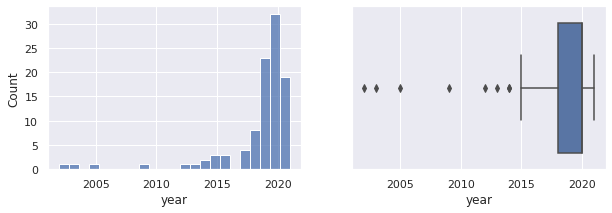

In [ ]:
#Release year
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_miss)
sns.boxplot(ax=ax[1],x='year', data=df_miss)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : ความคิดถึง')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s

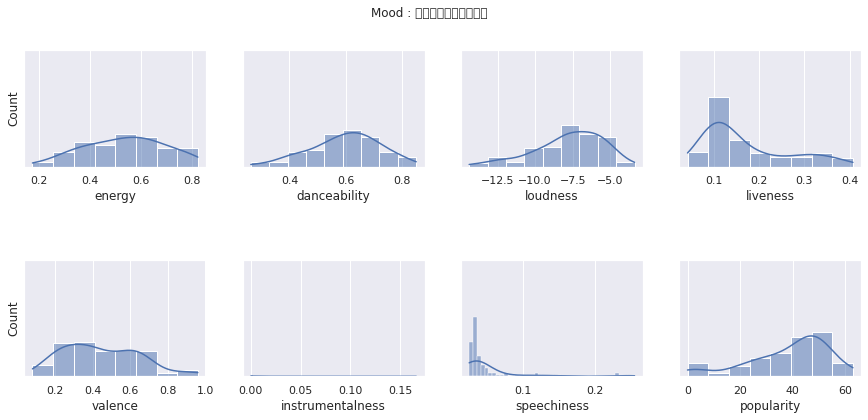

In [ ]:
plot_features_all(df_miss)

# 2.10ปีกับรักแสนเศร้า

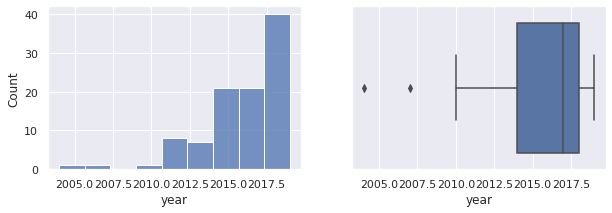

In [ ]:
#Release year
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_sad)
sns.boxplot(ax=ax[1],x='year', data=df_sad)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : 10ปีกับรักแสนเศร้า')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s

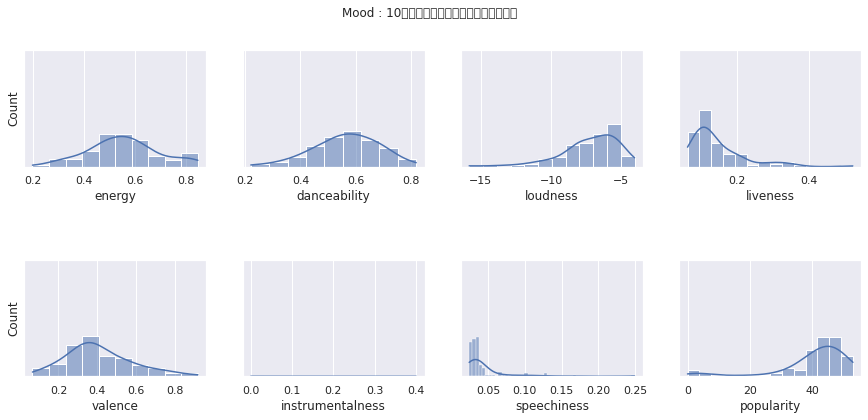

In [ ]:
plot_features_all(df_sad)

# 3.ร้องไห้หนักมาก

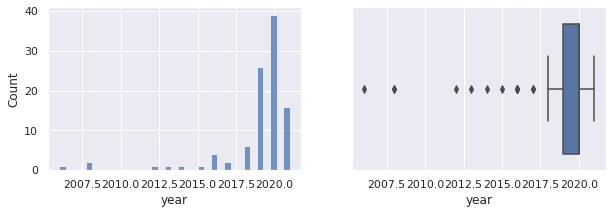

In [ ]:
#Release year
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_cry)
sns.boxplot(ax=ax[1],x='year', data=df_cry)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : ร้องไห้หนักมาก')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s

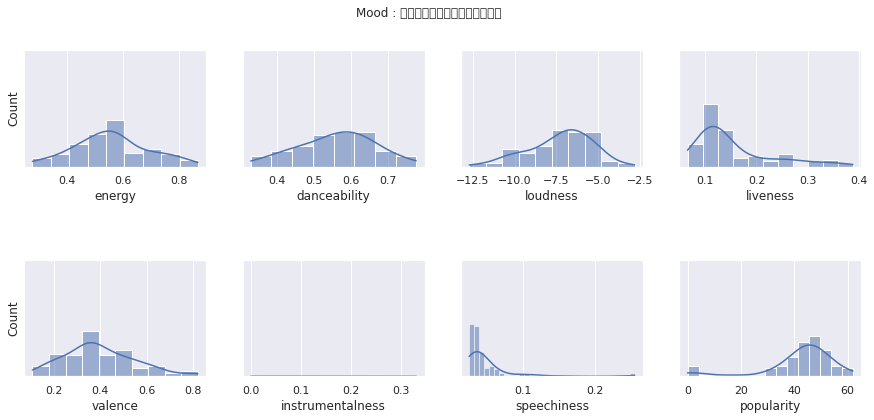

In [ ]:
plot_features_all(df_cry)

# 4.เป็นท้อ

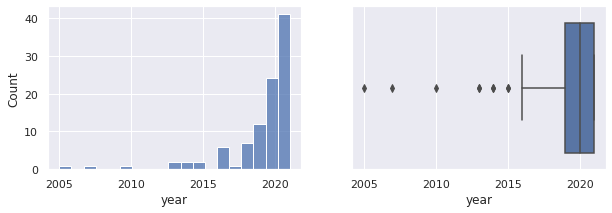

In [ ]:
#Release year
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_dis)
sns.boxplot(ax=ax[1],x='year', data=df_dis)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : เป็นท้อ')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3655 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s

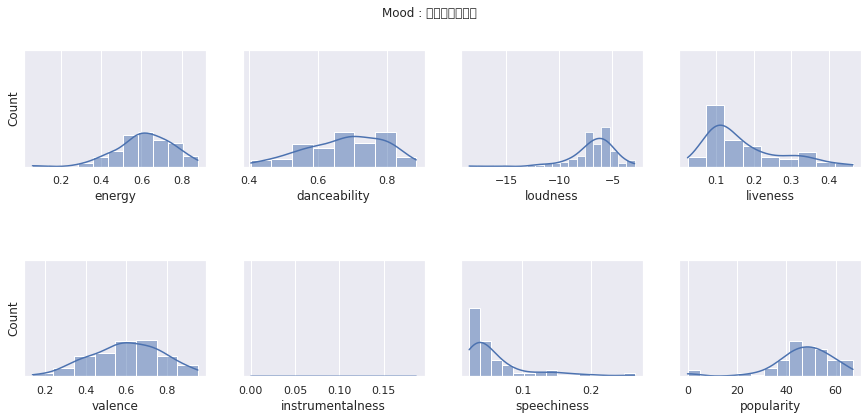

In [ ]:
plot_features_all(df_dis)

# 5.เพลงรักไม่เคยลืม

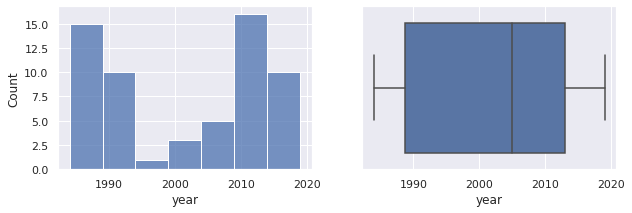

In [ ]:
#Release year
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_love)
sns.boxplot(ax=ax[1],x='year', data=df_love)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : เพลงรักไม่เคยลืม')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s

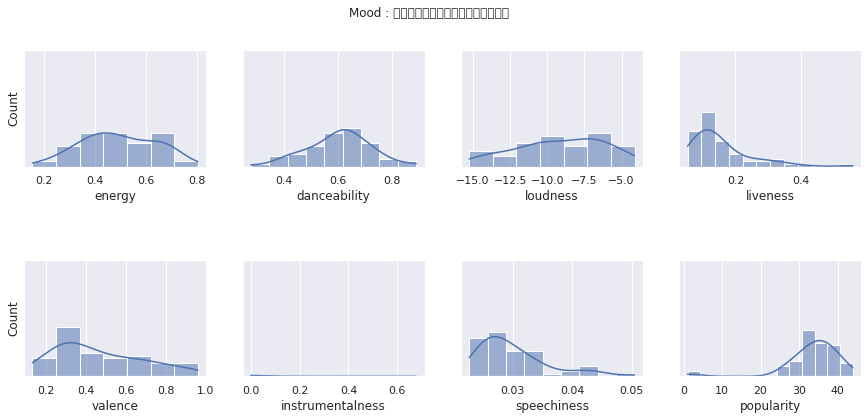

In [ ]:
plot_features_all(df_love)

# 6.ฟังเพลินตอนทำงาน

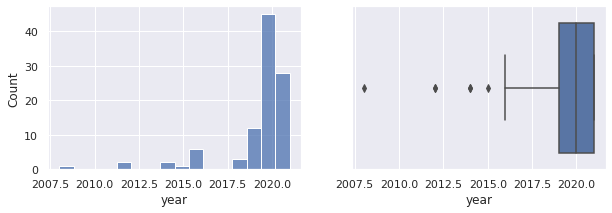

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_work)
sns.boxplot(ax=ax[1],x='year', data=df_work)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : ฟังเพลินตอนทำงาน')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s

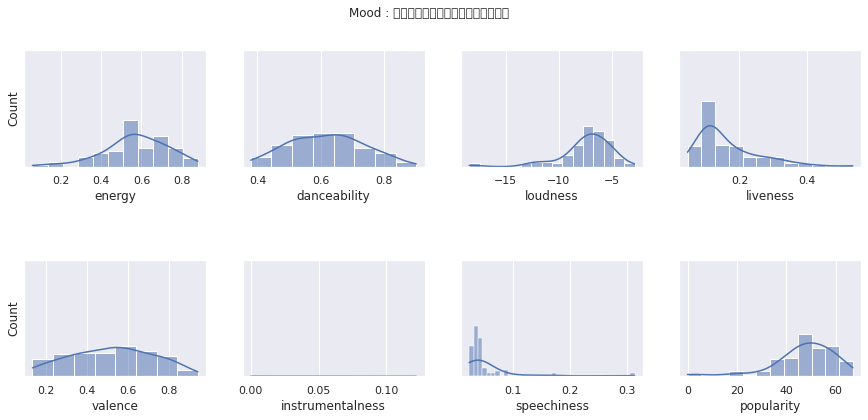

In [ ]:
plot_features_all(df_work)

# 7.อารมณ์ทะเล

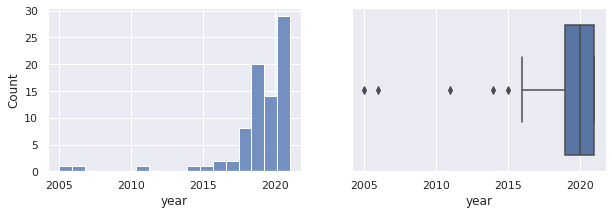

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_sea)
sns.boxplot(ax=ax[1],x='year', data=df_sea)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : อารมณ์ทะเล')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3603 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3660 missing from current font.
  font.set_text(s

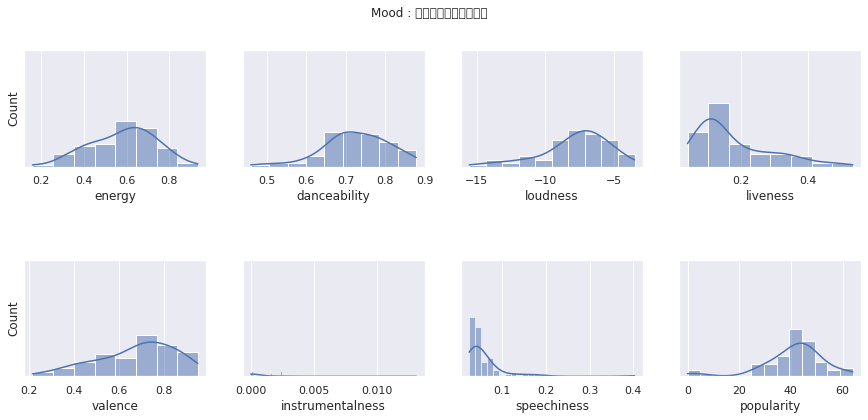

In [ ]:
plot_features_all(df_sea)

# 8.เพลงไทยสายชิลล์

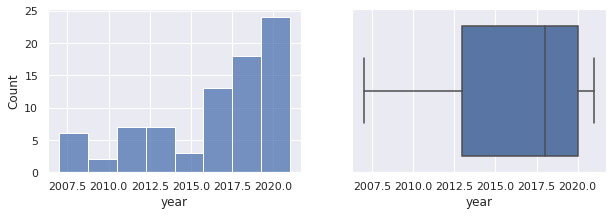

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_chill)
sns.boxplot(ax=ax[1],x='year', data=df_chill)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : เพลงไทยสายชิลล์')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s

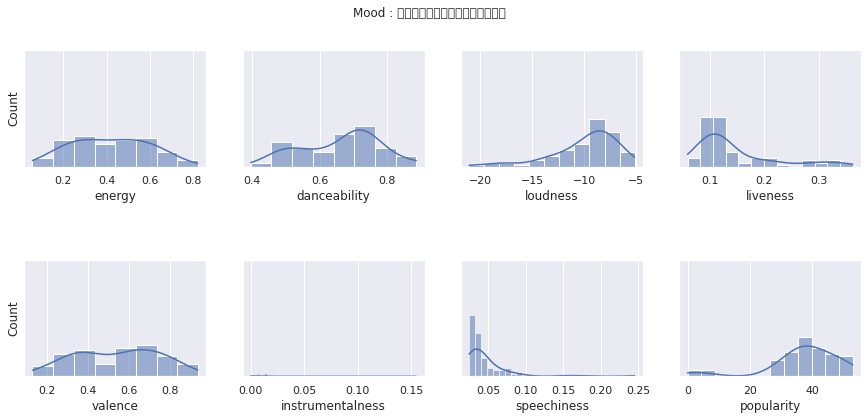

In [ ]:
plot_features_all(df_chill)

# 9.เหนื่อยนักพักก่อน

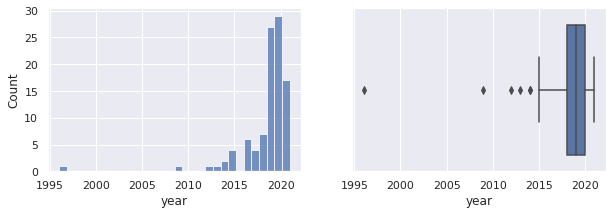

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_tired)
sns.boxplot(ax=ax[1],x='year', data=df_tired)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : เหนื่อยนักพักก่อน')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s

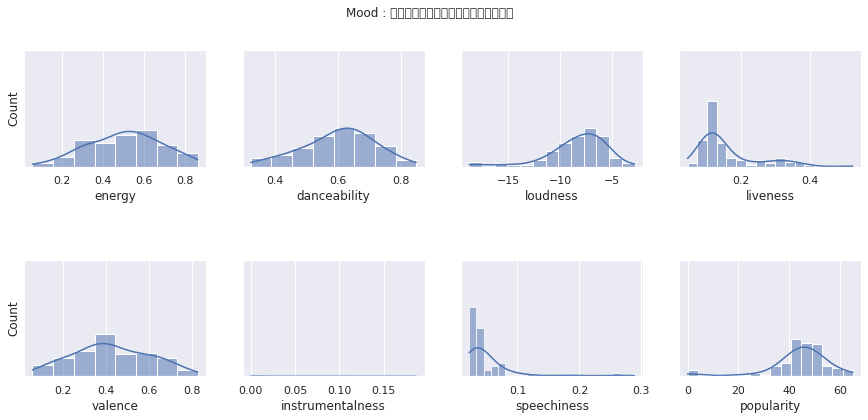

In [ ]:
plot_features_all(df_tired)

# 10.ชิลล์ฮอป

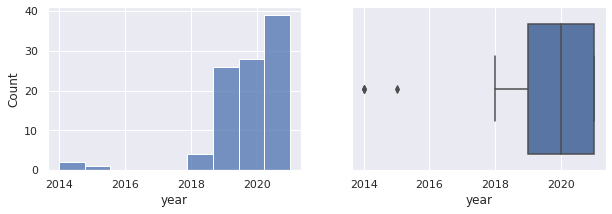

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_hop)
sns.boxplot(ax=ax[1],x='year', data=df_hop)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : ชิลล์ฮอป')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3630 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s

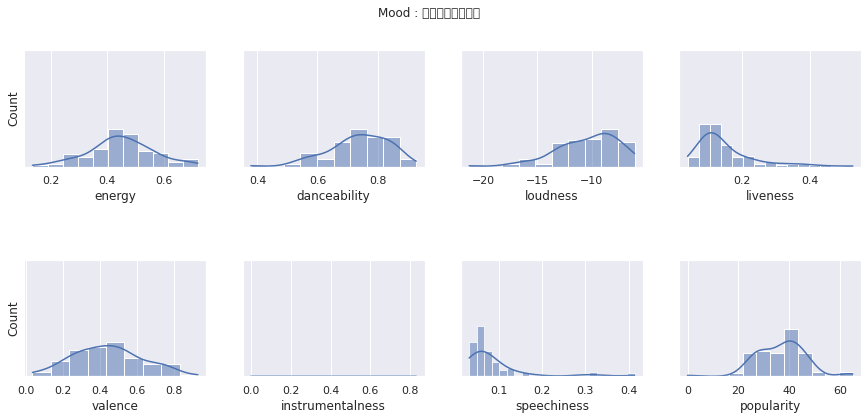

In [ ]:
plot_features_all(df_hop)

# part 2 Df ที่รวมทุก mood

In [ ]:
df_5mood=pd.concat([df_miss,df_sad,df_cry,df_dis,df_love],keys=[0,1,2,3,4])

In [ ]:
df_5mood

artist  ...  year
0 0                              Patrickananda  ...  2020
  1                                 Musketeers  ...  2015
  2                              Ink Waruntorn  ...  2020
  3                                       Hers  ...  2017
  4                                Tilly Birds  ...  2020
...                                        ...  ...   ...
4 55  รวมศิลปิน (Best Retro Band - ความในใจ 1)  ...  2013
  56                                      Nuvo  ...  1988
  57                                    Fruity  ...  1984
  58                            Itti Balangura  ...  2010
  59                                  ฟรุ๊ตตี้  ...  2010

[460 rows x 16 columns]

In [ ]:
df_5mood.to_csv("รวมเพลงครึ่งแรก.csv", index=False)

#วิเคราะห์อารมณ์

1.danceability 

2.energy

3.key

4.loudness



# 1.ความคิดถึง

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : miss')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

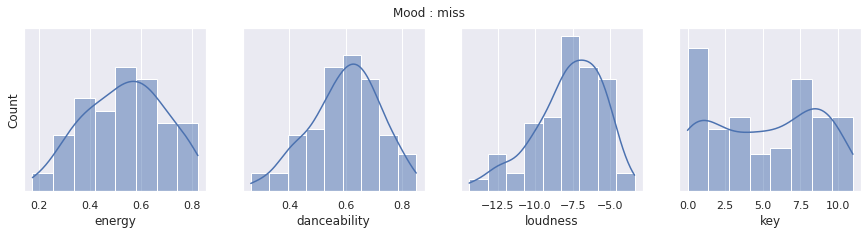

In [ ]:
plot_features_all(df_miss)

# 2.10ปีกับรักแสนเศร้า

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : sad')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

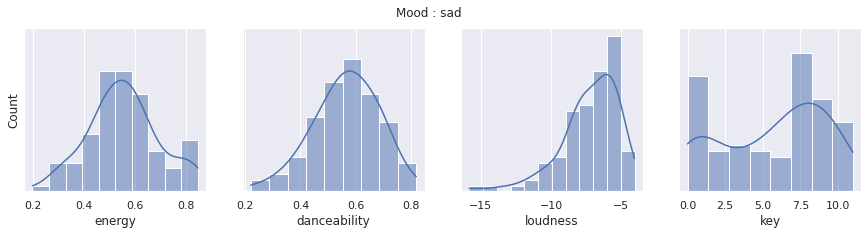

In [ ]:
plot_features_all(df_sad)

# 3.ร้องไห้หนักมาก

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : cry')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

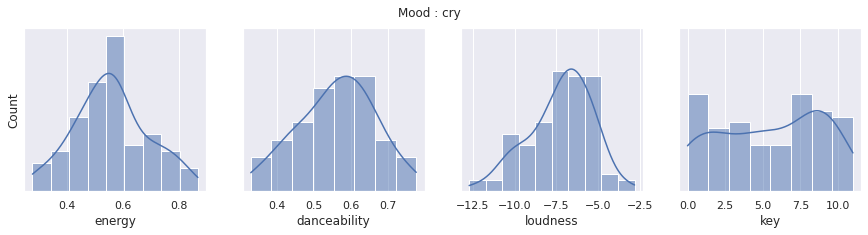

In [ ]:
plot_features_all(df_cry)

# 4.เป็นท้อ

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : discouraged')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

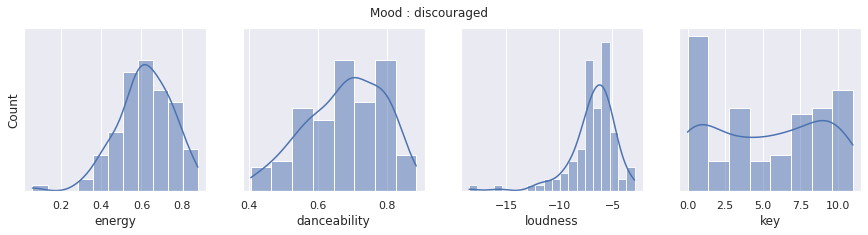

In [ ]:
plot_features_all(df_dis)

# 5.เพลงรักไม่เคยลืม

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : love')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

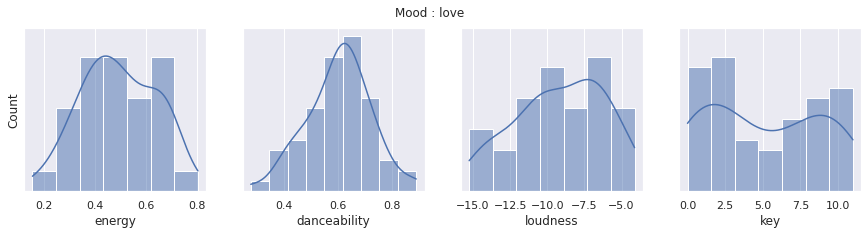

In [ ]:
plot_features_all(df_love)

# 6.ฟังเพลินตอนทำงาน

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : work')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

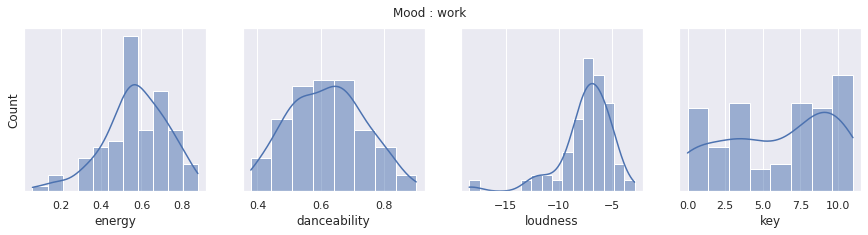

In [ ]:
plot_features_all(df_work)

# 7.อารมณ์ทะเล

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : sea')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

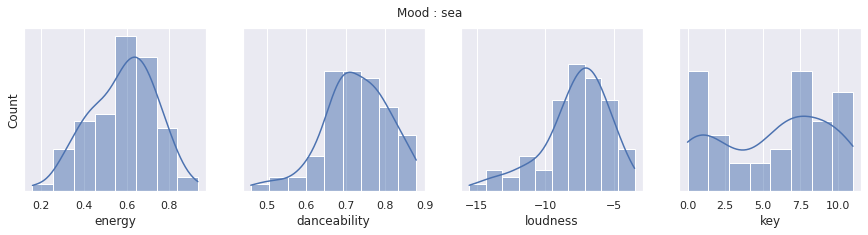

In [ ]:
plot_features_all(df_sea)

# 8.เพลงไทยสายชิลล์

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : chill')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

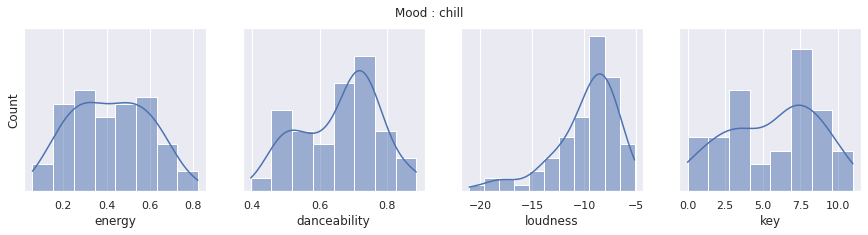

In [ ]:
plot_features_all(df_chill)

# 9.เหนื่อยนักพักก่อน

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : tired')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

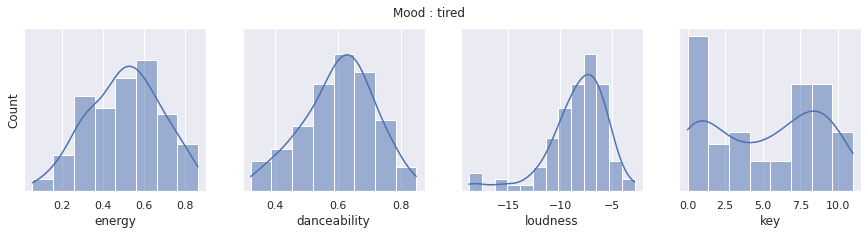

In [ ]:
plot_features_all(df_tired)

# 10.ชิลล์ฮอป

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(1,4, figsize=(15,3),sharey=True)
    fig.suptitle('Mood : hop')
    sns.histplot(ax=ax[0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[3], x= 'key', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

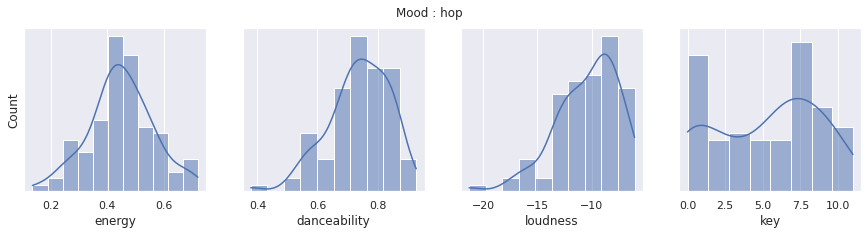

In [ ]:
plot_features_all(df_hop)

# Logistic regresstion

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

features_for_mood = ['danceability', 'energy', 'key', 'loudness',
                                     'valence', 'tempo', 'mode']



# FULLdata

In [6]:
trainx = pd.read_csv('full_train.csv',index_col=0)
trainx.head()

,danceability,energy,key,loudness,valence,tempo,mode,label
283,0.715,0.309,10,-11.412,0.651,93.006,1,sea
375,0.556,0.339,2,-7.177,0.253,81.180,1,tired
808,0.651,0.526,4,-4.835,0.352,85.442,1,lovesong
276,0.686,0.277,2,-13.337,0.292,117.958,1,chillhop
281,0.675,0.548,9,-9.225,0.809,160.066,1,sea


In [7]:
trainy = trainx[['label']]
trainy

,label
283,sea
375,tired
808,lovesong
276,chillhop
281,sea
...,...
574,missed
76,sad
573,missed
811,lovesong


In [8]:
trainx = trainx.drop(['label'], axis=1)
trainx

,danceability,energy,key,loudness,valence,tempo,mode
283,0.715,0.309,10,-11.412,0.651,93.006,1
375,0.556,0.339,2,-7.177,0.253,81.180,1
808,0.651,0.526,4,-4.835,0.352,85.442,1
276,0.686,0.277,2,-13.337,0.292,117.958,1
281,0.675,0.548,9,-9.225,0.809,160.066,1
...,...,...,...,...,...,...,...
574,0.407,0.518,2,-8.139,0.366,163.819,1
76,0.672,0.557,11,-7.973,0.550,129.970,1
573,0.621,0.675,10,-4.691,0.661,92.025,1
811,0.590,0.535,10,-5.619,0.161,78.109,1


In [9]:
testx = pd.read_csv('full_test.csv',index_col=0)
testx.head()

,danceability,energy,key,loudness,valence,tempo,mode,label
463,0.697,0.356,9,-9.217,0.601,66.995,1,work
300,0.563,0.719,5,-7.232,0.577,176.101,1,sea
607,0.413,0.580,4,-7.501,0.164,175.932,1,missed
700,0.758,0.764,7,-4.587,0.667,98.025,1,discourage
278,0.860,0.352,2,-15.719,0.734,84.048,0,chillhop


In [10]:
testy = testx[['label']]
testy

,label
463,work
300,sea
607,missed
700,discourage
278,chillhop
...,...
534,work
143,chillout
742,discourage
75,sad


In [11]:
testx = testx.drop(['label'], axis=1)
testx

,danceability,energy,key,loudness,valence,tempo,mode
463,0.697,0.356,9,-9.217,0.601,66.995,1
300,0.563,0.719,5,-7.232,0.577,176.101,1
607,0.413,0.580,4,-7.501,0.164,175.932,1
700,0.758,0.764,7,-4.587,0.667,98.025,1
278,0.860,0.352,2,-15.719,0.734,84.048,0
...,...,...,...,...,...,...,...
534,0.832,0.632,1,-6.982,0.830,102.992,1
143,0.776,0.617,7,-8.534,0.839,120.065,1
742,0.663,0.829,10,-5.680,0.712,111.993,0
75,0.337,0.696,7,-5.094,0.184,160.076,1


In [12]:
#trainy.values.ravel()

In [13]:
#testy.values.ravel()

# accuracy

In [14]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(trainx[features_for_mood])
logreg = LogisticRegression(max_iter=2000)
logreg.fit(train_scaled, trainy)
#print (accuracy_score(logreg.predict(train_scaled), trainy))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2000)

In [15]:
print (accuracy_score(logreg.predict(train_scaled), trainy))

0.30745341614906835


In [ ]:
scores = cross_val_score(logreg, train_scaled, trainy, cv=5)
#print (scores.mean())

In [17]:
print (scores.mean())

0.24996366279069768


# best estimate

In [ ]:
params = {"C" : np.logspace(-6, 3, 10)}
clf = GridSearchCV(logreg, params)
clf.fit(train_scaled, trainy)
#print (clf.best_estimator_.C)
#print (clf.best_score_)

In [19]:
print (clf.best_estimator_.C)
print (clf.best_score_)

0.1
0.2530644379844961


In [33]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(testx[features_for_mood])
#logreg = LogisticRegression(max_iter=2000)
#logreg.fit(train_scaled, trainy)


In [34]:
logreg = LogisticRegression(max_iter=2000, C=0.1)
logreg.fit(test_scaled, testy)
preds = clf.predict(test_scaled)
#print (accuracy_score(preds, testy))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print (accuracy_score(preds, testy))

0.213768115942029


In [23]:
import math

In [24]:
fi = pd.DataFrame(clf.best_estimator_.coef_, columns=features_for_mood)
pow(math.e, fi)
fo = fi.set_axis(logreg.classes_, axis=0)
fo
fo.idxmax(axis=1)

chillhop      danceability
chillout           valence
cry               loudness
discourage          energy
lovesong           valence
missed                mode
sad               loudness
sea                valence
tired                 mode
work              loudness
dtype: object

In [25]:
fo

,danceability,energy,key,loudness,valence,tempo,mode
chillhop,1.079051,0.110628,0.068015,-0.663063,-0.417661,0.220827,-0.303991
chillout,0.162206,-0.578826,0.041169,-0.276028,0.423009,0.176955,0.071321
cry,-0.382984,0.095954,0.217111,0.409103,-0.659843,0.026024,-0.064246
discourage,0.224068,0.289881,0.115590,0.173692,0.154871,0.015935,0.003862
lovesong,-0.344452,-0.070412,-0.178848,-0.208695,0.049140,-0.271040,-0.034234
missed,-0.358790,0.052579,-0.035069,0.185340,-0.095128,-0.007698,0.221342
sad,-0.578906,0.003382,-0.071734,0.312465,-0.210555,-0.101068,0.068668
sea,0.639365,0.106478,-0.008214,-0.174810,0.763526,0.082007,-0.077262
tired,-0.313137,-0.141527,-0.106371,0.076731,-0.116592,-0.261199,0.117629
work,-0.126422,0.131862,-0.041649,0.165267,0.109233,0.119257,-0.003089


In [26]:
fo.to_csv('matrix_fullspotify_data_senior_project64.csv', sep='\t')